<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('/content/house_train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum().sort_values(ascending = False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

카테고리형 변수 One_Hot Encoding

In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


결측치 채우기

In [9]:
df = df.fillna(df.mean())

상관관계

In [10]:
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending = False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

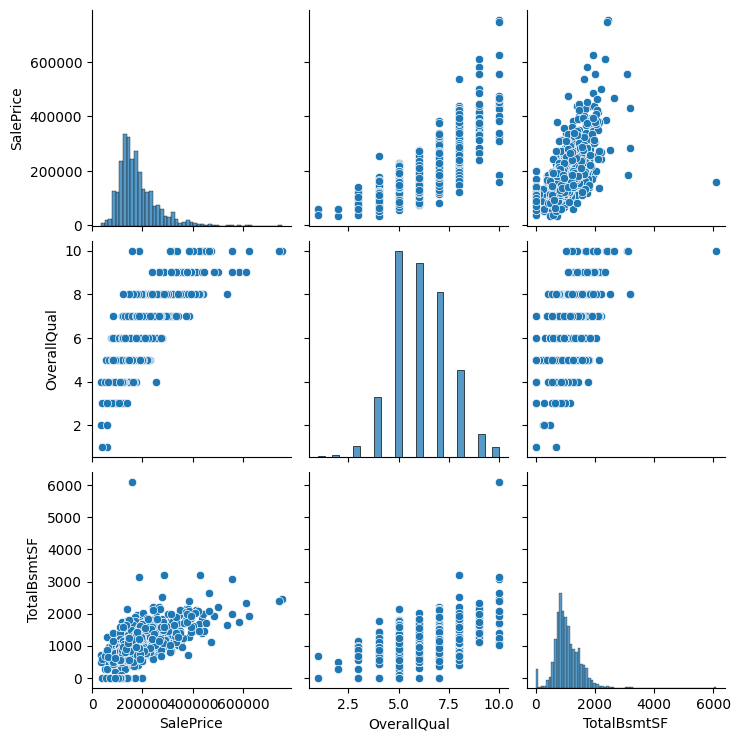

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt

cols = ['SalePrice', 'OverallQual', 'TotalBsmtSF']
sn.pairplot(df[cols])
plt.show()

In [12]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [14]:
cols_train = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
x = df[cols_train]
y = df['SalePrice'].values
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.2)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim = x_tr.shape[1], activation = 'relu'))
model.add(keras.layers.Dense(30, activation = 'relu'))
model.add(keras.layers.Dense(40, activation = 'relu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

model_path = '/content/sample_data/best.hdf5'

checkpointer = ModelCheckpoint(filepath = model_path, monitor = 'val_loss', verbose = 0, save_best_only = True)

In [19]:
history = model.fit(x_tr, y_tr, validation_split = 0.25, epochs = 2000, batch_size = 32, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
28/28 [==============================] - 1s 8ms/step - loss: 39055073280.0000 - val_loss: 37175472128.0000
Epoch 2/2000
28/28 [==============================] - 0s 3ms/step - loss: 38735060992.0000 - val_loss: 36894220288.0000
Epoch 3/2000
28/28 [==============================] - 0s 2ms/step - loss: 38313033728.0000 - val_loss: 36265570304.0000
Epoch 4/2000
28/28 [==============================] - 0s 3ms/step - loss: 37303037952.0000 - val_loss: 34704789504.0000
Epoch 5/2000
28/28 [==============================] - 0s 3ms/step - loss: 34939568128.0000 - val_loss: 31213262848.0000
Epoch 6/2000
28/28 [==============================] - 0s 3ms/step - loss: 29974861824.0000 - val_loss: 24579909632.0000
Epoch 7/2000
28/28 [==============================] - 0s 3ms/step - loss: 21580435456.0000 - val_loss: 15098462208.0000
Epoch 8/2000
28/28 [==============================] - 0s 3ms/step - loss: 11726496768.0000 - val_loss: 5847961088.0000
Epoch 9/2000
28/28 [=====================

In [20]:
from tensorflow.keras.models import load_model

In [21]:
load_model = load_model('/content/sample_data/best.hdf5')

In [22]:
real_price = []
pred_price = []
x_num = []
n = 0

y_pred = model.predict(x_te).flatten()

for i in range(25):
  real = y_te[i]
  pred = y_pred[i]
  print('실제가격: %.2f, 예상가격: %.2f' %(real, pred))
  real_price.append(real)
  pred_price.append(pred)
  n += 1
  x_num.append(n)

10/10 [==============================] - 0s 1ms/step
실제가격: 179540.00, 예상가격: 161174.66
실제가격: 135000.00, 예상가격: 145969.38
실제가격: 264132.00, 예상가격: 210894.58
실제가격: 185000.00, 예상가격: 187710.50
실제가격: 239686.00, 예상가격: 257208.78
실제가격: 154000.00, 예상가격: 180258.50
실제가격: 169000.00, 예상가격: 187877.78
실제가격: 256300.00, 예상가격: 245778.28
실제가격: 76000.00, 예상가격: 115067.02
실제가격: 158000.00, 예상가격: 172805.08
실제가격: 359100.00, 예상가격: 259874.11
실제가격: 196000.00, 예상가격: 192361.47
실제가격: 99900.00, 예상가격: 90938.34
실제가격: 228000.00, 예상가격: 223819.56
실제가격: 255500.00, 예상가격: 260463.59
실제가격: 58500.00, 예상가격: 108143.10
실제가격: 130000.00, 예상가격: 118794.98
실제가격: 156000.00, 예상가격: 147177.28
실제가격: 319900.00, 예상가격: 235287.59
실제가격: 118000.00, 예상가격: 130849.05
실제가격: 440000.00, 예상가격: 287609.47
실제가격: 157000.00, 예상가격: 187526.56
실제가격: 275000.00, 예상가격: 213784.42
실제가격: 128000.00, 예상가격: 159221.77
실제가격: 250000.00, 예상가격: 285384.34


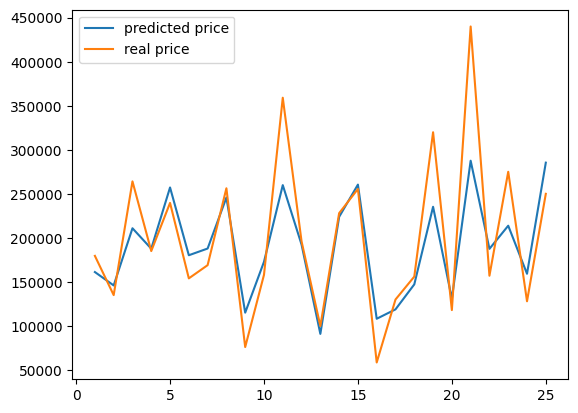

In [23]:
plt.plot(x_num, pred_price, label = 'predicted price')
plt.plot(x_num, real_price, label = 'real price')
plt.legend()
plt.show()

In [24]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import cv2

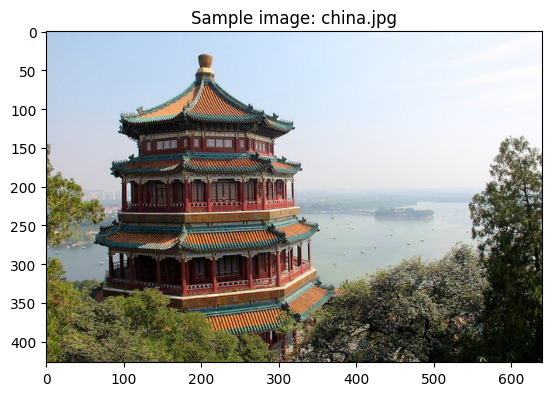

In [25]:
china = load_sample_image('china.jpg')
plt.imshow(china)
plt.title('Sample image: china.jpg')
plt.show()

(-0.5, 639.5, 426.5, -0.5)

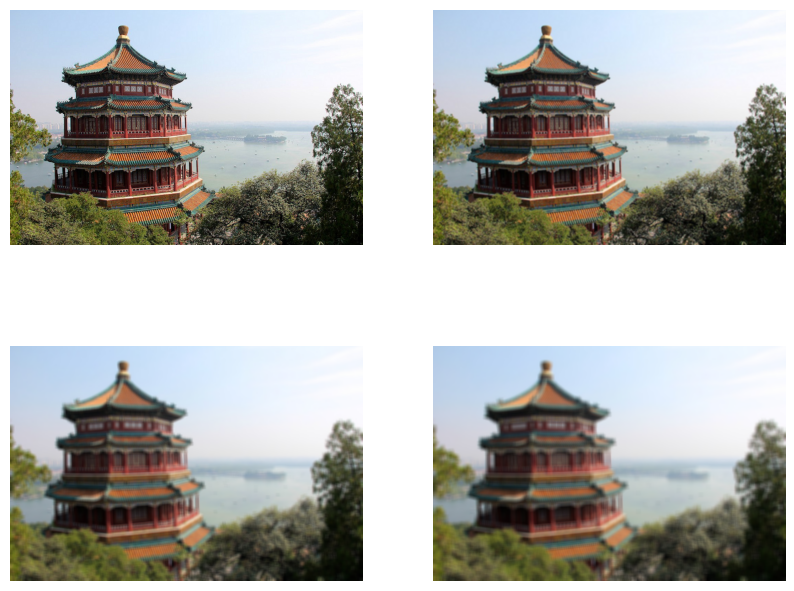

In [26]:
def blur_filter(img, n):
  filter = np.ones((n, n), np.float32) / (n * n)
  blurred = cv2.filter2D(img, -1, filter)
  return blurred

fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax[0,0].imshow(china)
ax[0,0].axis('off')
ax[0,1].imshow(blur_filter(china, 3))
ax[0,1].axis('off')
ax[1,0].imshow(blur_filter(china, 7))
ax[1,0].axis('off')
ax[1,1].imshow(blur_filter(china, 9))
ax[1,1].axis('off')

경계 검출 필터

세로 모서리를 강조하는 필터

Text(0.5, 1.0, 'Edge X')

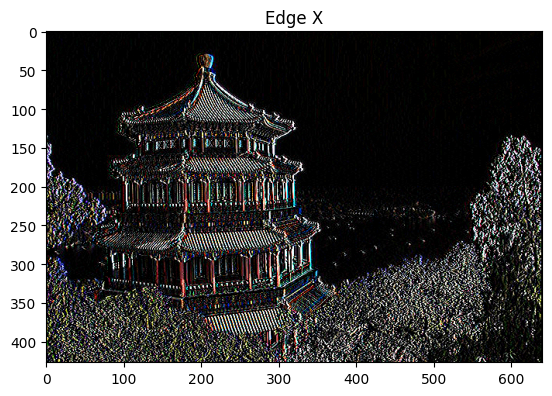

In [27]:
v_filter = np.array([[-4, 0, 4]])

v_filtered = cv2.filter2D(china, -1, v_filter)
plt.imshow(v_filtered)
plt.title('Edge X')

가로 모서리를 강조하는 필터

Text(0.5, 1.0, 'Edge Y')

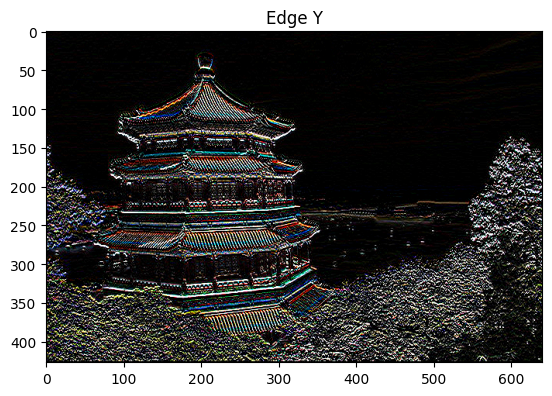

In [28]:
h_filter = np.array([[-4], [0], [4]])
h_filtered = cv2.filter2D(china, -1, h_filter)
plt.imshow(h_filtered)
plt.title('Edge Y')

합성곱 신경망

In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [30]:
fashion_mnist = keras.datasets.fashion_mnist
(train_img, train_lab), (test_img, test_lab) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [31]:
train_img.shape

(60000, 28, 28)

합성곱 신경망 모델 : (데이터 인스턴스 수, 행 수, 열 수, 채널 수)

fashion_mnist는 회색조이므로 채널 수는 1

In [32]:
train_img = train_img[:, :, :, np.newaxis]
test_img = test_img[:, :, :, np.newaxis]
train_img, test_img  = train_img / 255, test_img / 255

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), padding = 'same', filters = 32))
model.add(keras.layers.MaxPooling2D((2, 2), strides = 2))
model.add(keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same', filters = 64))
model.add(keras.layers.MaxPooling2D((2, 2), strides = 2))
model.add(keras.layers.Conv2D(kernel_size = (3, 3), padding = 'same', filters = 32))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 1568)             

In [35]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_img, train_lab, epochs = 5, validation_split = 0.25)

Epoch 1/5
1407/1407 [==============================] - 48s 33ms/step - loss: 0.4579 - accuracy: 0.8344 - val_loss: 0.3493 - val_accuracy: 0.8714
Epoch 2/5
1407/1407 [==============================] - 48s 34ms/step - loss: 0.2978 - accuracy: 0.8914 - val_loss: 0.2856 - val_accuracy: 0.8940
Epoch 3/5
1407/1407 [==============================] - 47s 34ms/step - loss: 0.2505 - accuracy: 0.9081 - val_loss: 0.2644 - val_accuracy: 0.9025
Epoch 4/5
1407/1407 [==============================] - 49s 35ms/step - loss: 0.2199 - accuracy: 0.9195 - val_loss: 0.2832 - val_accuracy: 0.9009
Epoch 5/5
1407/1407 [==============================] - 50s 36ms/step - loss: 0.1922 - accuracy: 0.9280 - val_loss: 0.2694 - val_accuracy: 0.9061


In [39]:
test_loss, test_acc = model.evaluate(test_img, test_lab, verbose = 2)
print('테스트 정확도: %.4f' %test_acc)

313/313 - 3s - loss: 0.2847 - accuracy: 0.9042 - 3s/epoch - 9ms/step
테스트 정확도: 0.9042


In [45]:
images = test_img[:25]
pred = model.predict(images).argmax(axis = 1)
print('예측값: ', pred)
print('실제값: ', test_lab[:25])

1/1 [==============================] - 0s 38ms/step
예측값:  [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 5 1]
실제값:  [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]


모델 결과 시각화

In [50]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

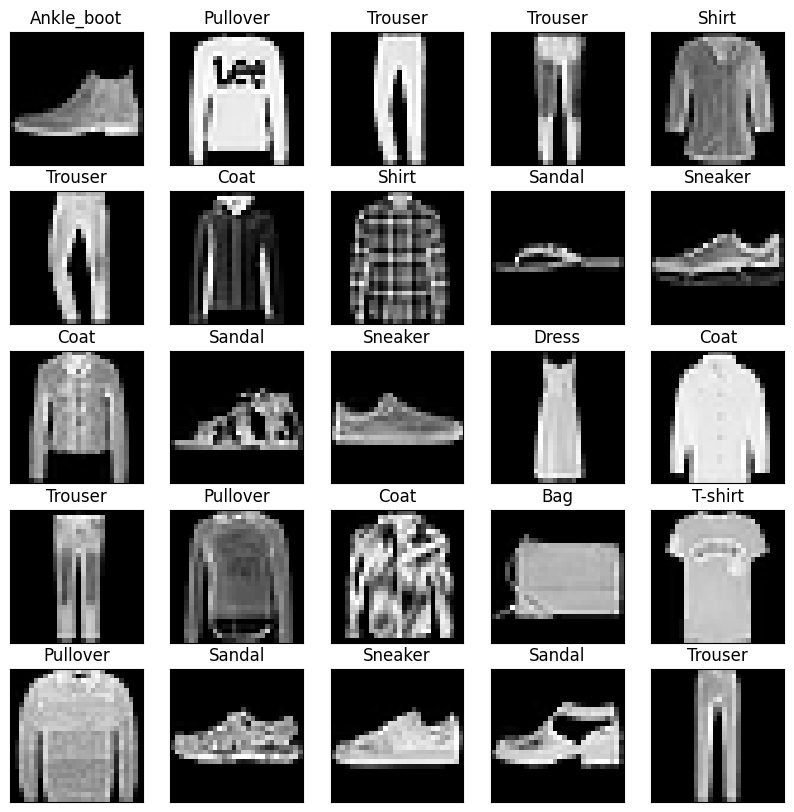

In [51]:
def plot_img(images, labels, images_per_row = 5):
  n_img = len(images)
  n_rows = (n_img - 1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row, figsize = (images_per_row * 2, n_rows * 2))

  for i in range(n_rows):
    for j in range(images_per_row):
      if i * images_per_row + j >= n_img:
        break
      img_idx = i * images_per_row + j
      a_image = images[img_idx].reshape(28, 28)
      if n_rows > 1:
        axis = ax[i, j]
      else:
        axis = ax[j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      label = mnist_lbl[labels[img_idx]]
      axis.set_title(label)
      axis.imshow(a_image, cmap = 'gray', interpolation = 'nearest')

plot_img(images, pred, images_per_row = 5)